# Modelo de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* x: 100 valores distribuidos segun una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estara distribuido segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.rand(100)

In [3]:
res = 0 + 0.8 *np.random.randn(100)

In [4]:
y_pred = 5 + 1.9*x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_lista = x.tolist()
y_pred_lista = y_pred.tolist()
y_act_lista = y_act.tolist()

In [7]:
datos = pd.DataFrame(
    {
        "x" : x_lista,
        "y_actual" : y_act_lista,
        "y_prediccion" : y_pred_lista
    }
)

In [8]:
datos.head()

,x,y_actual,y_prediccion
0,1.580542,7.792301,8.003030
1,3.715534,11.216026,12.059515
2,3.779961,12.914774,12.181925
3,1.608052,8.243653,8.055299
4,1.661721,7.933306,8.157270


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_promedio = [np.mean(y_act) for i in range (1, len(x_lista)+1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

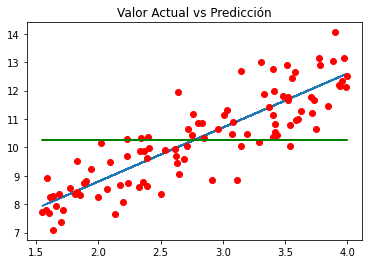

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot (x, y_act, "ro")
plt.plot (x, y_promedio, "g")
plt.title("Valor Actual vs Predicción")

In [12]:
datos ["SSR"] = (datos["y_prediccion"] - np.mean(y_act))**2
datos ["SSD"] = (datos["y_prediccion"] - datos ["y_actual"])**2
datos ["SST"] = (datos["y_actual"] - np.mean(y_act))**2

In [13]:
datos.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.580542,7.792301,8.003030,5.152269,0.044407,6.153327
1,3.715534,11.216026,12.059515,3.192024,0.711473,0.889503
2,3.779961,12.914774,12.181925,3.644409,0.537067,6.979543
3,1.608052,8.243653,8.055299,4.917718,0.035477,4.117810
4,1.661721,7.933306,8.157270,4.475853,0.050160,5.473659


In [14]:
SSR = sum(datos["SSR"])
SSD = sum(datos["SSD"])
SST = sum(datos["SST"])

In [15]:
SSR

204.4036695913933

In [16]:
SSD

64.43965538612485

In [17]:
SST

259.6758882593413

In [18]:
SSR+SSD

268.84332497751814

In [19]:
R2 = SSR/SST

In [20]:
R2

0.7871492072735417

(array([ 4.,  3.,  8., 17., 18., 19., 13., 12.,  3.,  3.]),
 array([-1.9310817 , -1.53323817, -1.13539463, -0.73755109, -0.33970756,
         0.05813598,  0.45597951,  0.85382305,  1.25166658,  1.64951012,
         2.04735365]),
 <BarContainer object of 10 artists>)

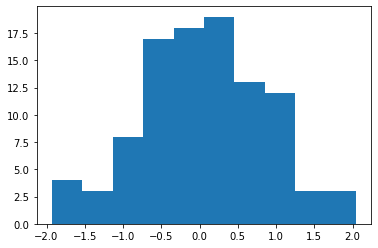

In [21]:
plt.hist(datos["y_prediccion"] - datos ["y_actual"])

## Obteniendo la recta de regresión


In [22]:
x_promedio = np.mean(datos["x"])
y_promedio = np.mean(datos["y_actual"])
x_promedio, y_promedio

(2.805897996341355, 10.272891352152401)

In [23]:
datos["beta_n"] = (datos["x"]-x_promedio)*(datos["y_actual"]-y_promedio)
datos["beta_d"] = (datos["x"]-x_promedio)**2

In [24]:
beta= sum(datos["beta_n"])/sum(datos["beta_d"])

In [25]:
alpha = y_promedio - beta * x_promedio

In [26]:
alpha, beta

(5.0525516040357115, 1.8604880701021758)

El modelo lineal optenido por regresión es:
y=5.73322236388017 + 1.6177074043100745*x

In [27]:
datos["y_modelo"] =alpha + beta * datos["x"]

In [28]:
datos.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_modelo
0,1.580542,7.792301,8.003030,5.152269,0.044407,6.153327,3.039605,1.501497,7.993132
1,3.715534,11.216026,12.059515,3.192024,0.711473,0.889503,0.857910,0.827438,11.965259
2,3.779961,12.914774,12.181925,3.644409,0.537067,6.979543,2.573359,0.948798,12.085123
3,1.608052,8.243653,8.055299,4.917718,0.035477,4.117810,2.430716,1.434835,8.044313
4,1.661721,7.933306,8.157270,4.475853,0.050160,5.473659,2.676899,1.309141,8.144164


In [29]:
SSR = sum ((datos["y_modelo"] -y_promedio)**2)
SSD = sum ((datos["y_modelo"] - datos ["y_actual"])**2)
SST = sum((datos["y_actual"] - y_promedio)**2)

In [30]:
SSR, SSD, SST

(195.66454496636936, 64.01134329297211, 259.67588825934143)

In [31]:
R2 = SSR/SST
R2

0.7534952369969631

Text(0.5, 1.0, 'Valor Actual vs Predicción')

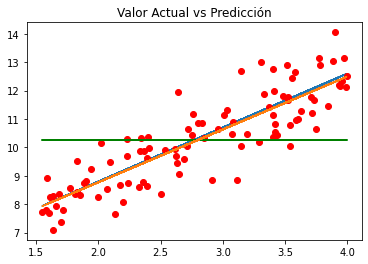

In [32]:
y_promedio = [np.mean(y_act) for i in range (1, len(x_lista)+1)]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot (x, y_act, "ro")
plt.plot (x, y_promedio, "g")
plt.plot(datos["x"], datos["y_modelo"])
plt.title("Valor Actual vs Predicción")